# Bitcoin price Prediction using LSTM

In [300]:
#!pip install tensorflow==2.10.0

![](https://media.giphy.com/media/JXAzHiZ3xEDgwAGOce/giphy.gif) 

# [](http://) Table of Content 
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Building Model
## 6. Prediction
## 7. Evaluation 
## 8. Conclusion
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

![image](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)

# 2. Importing Library

In [301]:
# First we will import the necessary Library 
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from datetime import timedelta

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library
import seaborn as sns

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

#  [We  used this links to download bitcoin dataset from yahoo finance and oil crud data sets https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD https://www.investing.com/commodities/crude-oil-historical-data 

In [302]:
# Load our dataset 
# Note it should be in same dir



#loading bitcoin dataset

df_bitcoin=pd.read_csv('/content/BTC-USD.csv')

#df_bitcoin = pd.read_csv('/content/BTC-USD.csv',index_col='Date', parse_dates=True)


#loading etherum dataset
df_etherum=pd.read_csv('/content/ETH-USD.csv')
#loading crud oil dataset (not including close feature)
df_crud_oil=pd.read_csv('/content/crudOil_USD.csv')

# #Scrapping oil data from fiannce.yahoo
# import csv
# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# my_url = "https://finance.yahoo.com/quote/CL%3DF/history?period1=1512604800&period2=1670371200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
# # here we define the headers for the request
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0'}
# # this request object will integrate your URL and the headers defined above
# req = urllib.request.Request(url=my_url,headers=headers)
# html = urlopen(req)
# bs = BeautifulSoup(html, 'html.parser')
# table = bs.findAll('table')[0]
# rows = table.findAll('tr')
# csvFile = open('oil.csv', 'wt+')
# writer = csv.writer(csvFile)
# try:
#     for row in rows:
#         csvRow = []
#         for cell in row.findAll(['td', 'th']):
#             csvRow.append(cell.get_text())
#             writer.writerow(csvRow)
# finally:
#     csvFile.close()   

In [303]:
print('Total number of days present in the bitcoin dataset: ',df_bitcoin.shape[0])
print('Total number of fields present in the bitcoin dataset: ',df_bitcoin.shape[1])
print('Total number of days present in the ethereum dataset: ',df_etherum.shape[0])
print('Total number of fields present in the ethereum dataset: ',df_etherum.shape[1])
print('Total number of days present in the crudoil dataset: ',df_crud_oil.shape[0])
print('Total number of fields present in the crudoil dataset: ',df_crud_oil.shape[1])

Total number of days present in the bitcoin dataset:  3006
Total number of fields present in the bitcoin dataset:  7
Total number of days present in the ethereum dataset:  1855
Total number of fields present in the ethereum dataset:  7
Total number of days present in the crudoil dataset:  1567
Total number of fields present in the crudoil dataset:  7


In [304]:
print(df_bitcoin.shape)
print(df_etherum.shape)
print(df_crud_oil.shape)

(3006, 7)
(1855, 7)
(1567, 7)


In [305]:
print(df_bitcoin.head())
print(df_etherum.head())
print(df_crud_oil.head())



         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
         Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.7

In [306]:
#reverse oil data set to be ascending like others data sets
df_crud_oil = df_crud_oil[::-1]  
print(df_crud_oil.head())


            Date  Price   Open   High    Low     Vol. Change %
1566  01/02/2017  54.03  54.09  54.18  54.01      NaN    0.58%
1565  01/03/2017  52.33  54.20  55.24  52.11  727.79K   -3.15%
1564  01/04/2017  53.26  52.49  53.43  52.15  512.64K    1.78%
1563  01/05/2017  53.76  53.39  54.12  52.79  517.36K    0.94%
1562  01/06/2017  53.99  53.73  54.32  53.32  528.33K    0.43%


In [307]:

print(df_bitcoin.tail())
print(df_etherum.tail())
print(df_crud_oil.tail())


            Date          Open          High           Low         Close  \
3001  2022-12-05  17128.894531  17378.152344  16922.431641  16974.826172   
3002  2022-12-06  16975.238281  17091.863281  16939.921875  17089.503906   
3003  2022-12-07  17089.505859  17109.376953  16750.558594  16848.126953   
3004  2022-12-08  16847.349609  17267.916016  16788.783203  17233.474609   
3005  2022-12-09  17235.054688  17268.072266  17101.570313  17101.570313   

         Adj Close       Volume  
3001  16974.826172  22209086834  
3002  17089.503906  19889922369  
3003  16848.126953  19675404389  
3004  17233.474609  20496603770  
3005  17101.570313  21021986816  
            Date         Open         High          Low        Close  \
1850  2022-12-03  1294.456543  1299.840332  1241.431885  1243.334839   
1851  2022-12-04  1243.219238  1281.492310  1242.911743  1280.256592   
1852  2022-12-05  1279.998901  1302.237549  1252.472412  1259.676758   
1853  2022-12-06  1259.854248  1271.923218  1247.62

In [308]:

print(df_bitcoin.info())
print(df_etherum.info())
print(df_crud_oil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3006 non-null   object 
 1   Open       3006 non-null   float64
 2   High       3006 non-null   float64
 3   Low        3006 non-null   float64
 4   Close      3006 non-null   float64
 5   Adj Close  3006 non-null   float64
 6   Volume     3006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 164.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1855 non-null   object 
 1   Open       1855 non-null   float64
 2   High       1855 non-null   float64
 3   Low        1855 non-null   float64
 4   Close      1855 non-null   float64
 5   Adj Close  1855 non-null   float64
 6   Volume     1855 non-null   int64  

In [309]:

print(df_bitcoin.describe())
print(df_etherum.describe())
print(df_crud_oil.describe())

               Open          High           Low         Close     Adj Close  \
count   3006.000000   3006.000000   3006.000000   3006.000000   3006.000000   
mean   12828.509178  13154.059845  12464.085839  12832.528415  12832.528415   
std    16245.668815  16661.877448  15763.757805  16240.736021  16240.736021   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      666.044265    681.769745    658.018479    667.645737    667.645737   
50%     7013.080079   7217.690674   6808.793945   7004.114991   7004.114991   
75%    16616.022461  17081.019531  16232.994385  16622.999511  16622.999511   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.006000e+03  
mean   1.634283e+10  
std    2.004396e+10  
min    5.914570e+06  
25%    9.932517e+07  
50%    7.214148e+09  
75%    2.810020e+10  
max    3.509679e+11  
              Open         High          Low        Close    Adj Close  \
count  1855.0000

# datasets  integration to be same formats 

In [310]:
#oil dataset column name Price changing to Close_oil 
df_crud_oil.rename(columns={"High": "Close_oil"},inplace=True)
#datasets changing 
df_crud_oil['Date'] = pd.to_datetime(df_crud_oil['Date'], format='%m/%d/%Y')
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'], format='%Y-%m-%d')
df_etherum['Date'] = pd.to_datetime(df_etherum['Date'], format='%Y-%m-%d')

print(df_bitcoin.head())
print(df_crud_oil.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
           Date  Price   Open  Close_oil    Low     Vol. Change %
1566 2017-01-02  54.03  54.09      54.18  54.01      NaN    0.58%
1565 2017-01-03  52.33  54.20      55.24  52.11  727.79K   -3.15%
1564 2017-01-04  53.26  52.49      53.43  52.15  512.64K    1.78%
1563 2017-01-05  53.76  53.39      54.12  52.79  517.36K    0.94%
1562 2017-01-06  53.99  53.73      54.32  53.32  528.33K    0.43%


# datasets merging 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f50f4e3e790>,
      dtype=object)

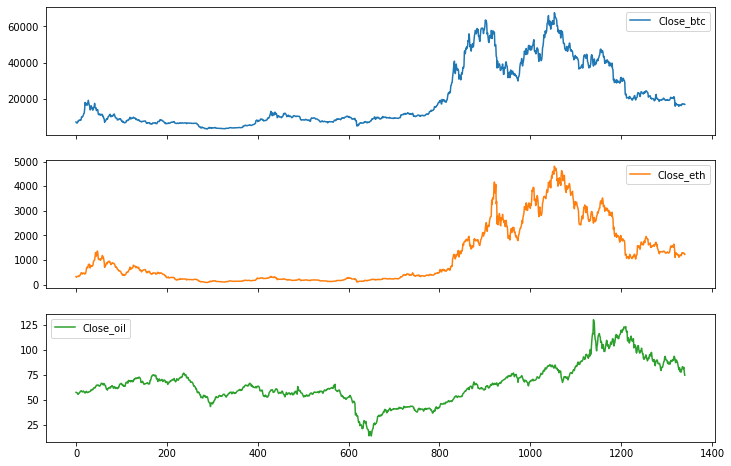

In [311]:
# we have to use merge because the datasets have not same length(different begin date )
#inner :communs values
main_df=pd.merge(df_bitcoin[['Date','Close']],df_etherum[['Date','Close']],on='Date',how ='inner',suffixes =('_btc','_eth'))
main_df=pd.merge(main_df,df_crud_oil[['Date','Close_oil']],on='Date',how ='inner')
#outer : tous les valeurs de euthrum et tous les valeuers de bitcoin
#pd.merge(bitcoin,ethereum,on='Date',how ='outer',suffixes =('_btc','_eth'))
#plot: problemes de echelles pour px ??
names = cycle(['Bitcoin Close Price','Ethereum Close Price','Oil Low Price'])

fig = px.line(main_df, x=main_df.Date, y=[main_df['Close_btc'], main_df['Close_eth'], 
                                          main_df['Close_oil']],
             labels={'Date': 'Date','value':'Close value'})
fig.update_layout(title_text='Close analysis chart', font_size=15, font_color='black',legend_title_text='Close Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
 # so we should different eshelles
fig.show()

main_df[['Close_btc','Close_eth','Close_oil']].plot(subplots=True,figsize=(12,8))



# Checking for Null Values

In [312]:

print('Null Values in bitcoin dataset:',df_bitcoin.isnull().values.sum())
print('Null Values in euthereum dataset:',df_etherum.isnull().values.sum())
print('Null Values in crud oil dataset:',df_crud_oil.isnull().values.sum())
print('Null Values in merged datasets:',main_df.isnull().values.sum())


Null Values in bitcoin dataset: 0
Null Values in euthereum dataset: 0
Null Values in crud oil dataset: 78
Null Values in merged datasets: 0


In [313]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

#btc_eth_oil=btc_eth_oil.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [314]:
# Final shape of the dataset after dealing with null values 

main_df.shape

(1341, 4)

# 4. EDA(Exploratory Data Analysis)

In [315]:
# Printing the start date and End date of the dataset

sd=main_df.iloc[0][0]
ed=main_df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2017-11-09 00:00:00
Ending Date 2022-12-07 00:00:00


## Corrleation beween features

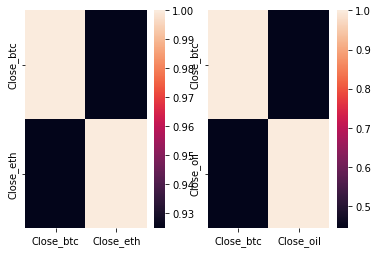

Correlation between bitcoin and ethereum  0.9247619858682408
Correlation between bitcoin and oil  0.44391934310007636


In [316]:
#correlation
# before correlation we need to normalize differents data 
# deleting date column and normalizing using MinMax Scaler
# main_df2=main_df.copy()
# scaler=MinMaxScaler(feature_range=(0,1))
# main_df2['Close_btc']=scaler.fit_transform(np.array(main_df2['Close_btc']).reshape(-1,1))
# main_df2['Close_oil']=scaler.fit_transform(np.array(main_df2['Close_oil']).reshape(-1,1))
# main_df2['Close_eth']=scaler.fit_transform(np.array(main_df2['Close_eth']).reshape(-1,1))
# print(main_df2.head())
correlations1=main_df[['Close_btc','Close_eth']].corr()
correlations2=main_df[['Close_btc','Close_oil']].corr()

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(correlations1, ax=ax1)
sns.heatmap(correlations2, ax=ax2)
plt.show()

print("Correlation between bitcoin and ethereum ",correlations1['Close_eth']['Close_btc'])
print("Correlation between bitcoin and oil ",correlations2['Close_btc']['Close_oil'])


#### StockPrice Analysis from Start

# Analysis of year 2014

In [317]:

y_2014 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2014-09-17')
                     & (df_bitcoin['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Adj Close','Volume']],axis=1)
print(df_bitcoin.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [318]:
# groupy by for groupping results by months 
# df.dt.strftime('%B')  =>Convert date to Month as locale’s full name.
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()


new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
#Conform Series/DataFrame to new index with optional filling logic
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


 Note that we only have few months in 2014 so the rest of the months are **NaN**

In [319]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [320]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [321]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

print(y_2014.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


# Analysis of Year 2015

In [322]:

y_2015 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2015-01-01')
                     & (df_bitcoin['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
106,2015-01-01,320.434998,320.434998,314.002991,314.248993
107,2015-01-02,314.079010,315.838989,313.565002,315.032013
108,2015-01-03,314.846008,315.149994,281.082001,281.082001
109,2015-01-04,281.145996,287.230011,257.612000,264.195007
110,2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...,...
466,2015-12-27,416.514008,424.006989,408.882996,422.822998
467,2015-12-28,423.342987,429.769012,418.480988,422.278992
468,2015-12-29,422.097992,432.983002,420.627014,432.983002
469,2015-12-30,433.299988,434.386993,422.084015,426.619995


In [323]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708667,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


In [324]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [325]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [326]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2016

In [327]:

y_2016 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2016-01-01')
                     & (df_bitcoin['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
471,2016-01-01,430.721008,436.246002,427.515015,434.334015
472,2016-01-02,434.622009,436.062012,431.869995,433.437988
473,2016-01-03,433.578003,433.743011,424.705994,430.010986
474,2016-01-04,430.061005,434.516998,429.084015,433.091003
475,2016-01-05,433.069000,434.182007,429.675995,431.959991
...,...,...,...,...,...
832,2016-12-27,908.354004,940.047974,904.255005,933.197998
833,2016-12-28,934.830994,975.921021,934.830994,975.921021
834,2016-12-29,975.125000,979.396973,954.502991,973.497009
835,2016-12-30,972.534973,972.534973,934.833008,961.237976


In [328]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


In [329]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [330]:
monthvise_high = y_2016.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [331]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'], 
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [332]:

y_2017 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2017-01-01')
                     & (df_bitcoin['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
837,2017-01-01,963.658020,1003.080017,958.698975,998.325012
838,2017-01-02,998.617004,1031.390015,996.702026,1021.750000
839,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966
840,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980
841,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005
...,...,...,...,...,...
1197,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000
1198,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000
1199,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195
1200,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195


In [333]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


In [334]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [335]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [336]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [337]:

y_2018 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2018-01-01')
                     & (df_bitcoin['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1202,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
1203,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
1204,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
1205,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
1206,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
1562,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
1563,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
1564,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
1565,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [338]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


In [339]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [340]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [341]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart 2018', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [342]:

y_2019 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2019-01-01')
                     & (df_bitcoin['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1567,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
1568,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
1569,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
1570,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
1571,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [343]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [344]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price 2018')
fig.show()

In [345]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [346]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [347]:

y_2020 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2020-01-01')
                     & (df_bitcoin['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [348]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [349]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price 2020')
fig.show()

In [350]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [351]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [352]:

y_2021 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2021-01-01')
                     & (df_bitcoin['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2657,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625
2658,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
2659,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
2660,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938


In [353]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [354]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price 2021')
fig.show()

In [355]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [356]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [357]:

y_2022 = df_bitcoin.loc[(df_bitcoin['Date'] >= '2022-01-01')
                     & (df_bitcoin['Date'] <= '2022-12-31')]
# we have some null because we have no data for the rest of month decembre (due to current date )
print(y_2022.isnull().count().sum())
y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)


2401


,Date,Open,High,Low,Close
2663,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
2664,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
2665,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
2666,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
2667,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
3001,2022-12-05,17128.894531,17378.152344,16922.431641,16974.826172
3002,2022-12-06,16975.238281,17091.863281,16939.921875,17089.503906
3003,2022-12-07,17089.505859,17109.376953,16750.558594,16848.126953
3004,2022-12-08,16847.349609,17267.916016,16788.783203,17233.474609


In [358]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [359]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price 2022' )
fig.show()

In [360]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df_bitcoin['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [361]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart 2022', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2014-2022

In [362]:

y_overall = df_bitcoin.loc[(df_bitcoin['Date'] >= '2014-09-17')
                     & (df_bitcoin['Date'] <= '2022-12-31')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
3001,2022-12-05,17128.894531,17378.152344,16922.431641,16974.826172
3002,2022-12-06,16975.238281,17091.863281,16939.921875,17089.503906
3003,2022-12-07,17089.505859,17109.376953,16750.558594,16848.126953
3004,2022-12-08,16847.349609,17267.916016,16788.783203,17233.474609


In [363]:
#monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
#new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
    #         'September', 'October', 'November', 'December']
#monthvise = monthvise.reindex(new_order, axis=0)
#monthvise

In [364]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 5. Building LSTM Model

* ## First Step is Preparing Data for Training and Testing

* ## Here we are just considering 1 year data for training data 

* ## Since Bitcoin price has drastically flucated from 200 dollar in year 2014 to 15000 dollar in year 2018 to 3000 dollar in year 2019(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.

* ## As we want to predict Close Price of the Bitcoin so we are just Considering Close and Date  

In [365]:
# Lets First Take all the Close Price 
closedf = main_df[['Date','Close_btc']]

print("Shape of close dataframe:", closedf.Date)

Shape of close dataframe: 0      2017-11-09
1      2017-11-10
2      2017-11-13
3      2017-11-14
4      2017-11-15
          ...    
1336   2022-12-02
1337   2022-12-04
1338   2022-12-05
1339   2022-12-06
1340   2022-12-07
Name: Date, Length: 1341, dtype: datetime64[ns]


In [366]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close_btc,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [367]:

current_date=dt.date.today();
date_of_one_year_ago = current_date.replace(year=current_date.year - 1 )
date_of_one_year_ago=date_of_one_year_ago.strftime('%Y-%m-%d')
closedf=closedf[closedf['Date'] > date_of_one_year_ago]
close_stock = closedf.copy()

print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  264


In [368]:
closedf
closedf.shape

(264, 2)

In [369]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close_btc,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [370]:
# deleting date column and normalizing using MinMax Scaler
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
closedf2=pd.DataFrame(closedf)
closedf2['Date']= main_df['Date']
closedf2.columns =['Close', 'Date']
print(closedf.shape)

(264, 1)


In [371]:
fig = px.line(closedf2, x=closedf2.Date, y=closedf2.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Normalized Close one year ago ', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


* ### Slicing data into Training set and Testing set

In [372]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print(train_data.shape)

train_data:  (158, 1)
test_data:  (106, 1)
(158, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [373]:
# convert an array of values into a dataset matrix
# forecasting that mean if i understand mixing data for not  focusing on a exactly period and an unique way of reprenting data to our training algorithm
# yaani lkol(dataX,dataY) bch ytaabdew b len(dataset)-time_step-1 cases 
# data Y bch tbda ml case numero time_stemp tetaaba 
# dataX tetaaba b i:(i+time_step) case kol mara w taawd taabi nafs ensemble tnahi menou l element lowl mta3 lmara li 9bal bi7aythou k toufa boucle tl9a aandk les ensembles nahy mnhom l element lowl m3awdin donc hethy facon bch tkhalt données w tmelangehom 
# k'insctru hethi       a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100  taaml kol mara liste b time_stemp element heka aaleh felekher tjik el shape 1782, w 15 l15 heki taille liste li taaml feha mch kif Y taille = 1 donc baaed f takhlit bch tl9a rouhk 9asemtohm deja brcha marat donc tkhalthom tji opa

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [374]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (142, 15)
y_train:  (142,)
X_test:  (90, 15)
y_test (90,)


In [375]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (142, 15, 1)
X_test:  (90, 15, 1)


* # Actuall Model Building

In [376]:
model=Sequential()
#simple we have only  two layers
#relu activation function should be only used in hidden layers
#Generaly we can begin with using the ReLu activation function  and then switch to other activations functions for optimum results 
#softmax function is used generaly in output layer
model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [377]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 2s 85ms/step - loss: 0.1785 - val_loss: 0.0062
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1362 - val_loss: 0.0036
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0963 - val_loss: 0.0021
Epoch 4/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0639 - val_loss: 0.0014
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0371 - val_loss: 0.0014
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 0.0182 - val_loss: 0.0020
Epoch 7/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0084 - val_loss: 0.0030
Epoch 8/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 9/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 10/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0092 - val_loss: 0.0038
Epoch 11/200
5/5 [=

- ### Plotting Loss vs Validation loss 

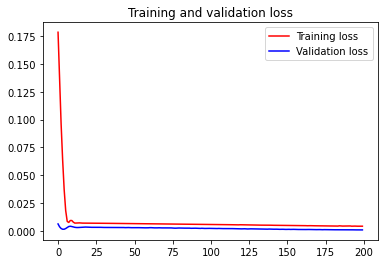

<Figure size 432x288 with 0 Axes>

In [378]:
loss = history.history['loss']
val_loss = history.history['val_loss']
#An epoch is when all the training data is used at once 
#and is defined as the total number of iterations of all the
#training data in one cycle for training the machine learning model
#Another way to define an epoch is the number of passes a training dataset takes around an algorithm
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [379]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((142, 1), (90, 1))

- # Model Evaluation

In [380]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [381]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2240.698768831997
Train data MSE:  5020730.972645226
Train data MAE:  1642.122111541373
-------------------------------------------------------------------------------------
Test data RMSE:  999.7388931045168
Test data MSE:  999477.8543858445
Test data MAE:  729.2822265652778


- ## Variance Regression Score

In [382]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9293804957832338
Test data explained variance regression score: 0.7924945196540973


- ## R square score for regression

In [383]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.929364215743215
Test data R2 score: 0.7725340269977916


- # Comparision of original Bitcoin close price and predicted close price

In [384]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close_btc'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (264, 1)
Test predicted data:  (264, 1)


- # Predicting next 30 days

In [385]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [386]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [451]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

print(df_bit)

- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [452]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

# # my add 30 days to date series
# today = current_date
# df=pd.DataFrame()
# df['Date']=df_bitcoin[df_bitcoin['Date'] > date_of_one_year_ago]['Date']
# print(df.shape)
# for i in range(30):
#   df['Date'][365+i]=today + timedelta(days=i+1)
# print(df['Date'].iloc[365])
# names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Thats it we are Done with Bitcoin Price Prediction using LSTM.

# Conclusion

In [453]:
fig = px.line(y_overall, x=y_overall.Date, y=y_overall['Close'].diff())
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole difference of  close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.show()